#### Lesson: LQ Control: Foundations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import LQ

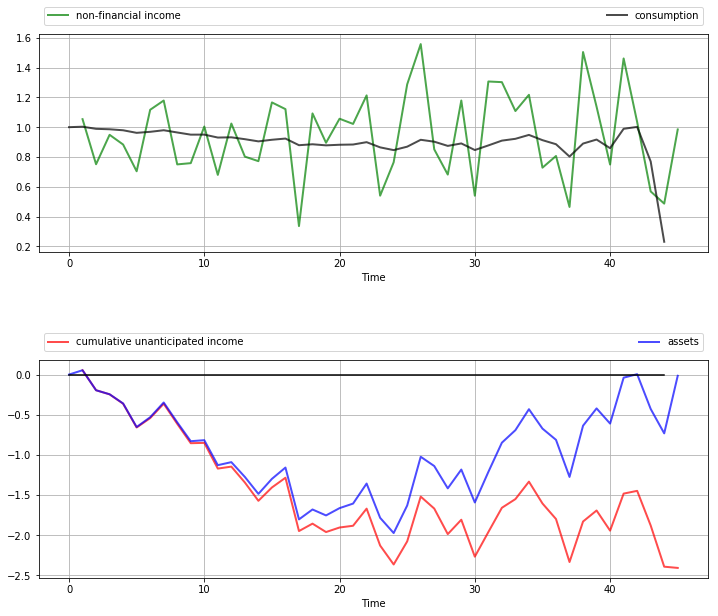

In [3]:
# Model parameters
r = 0.05
β = 1/(1 + r)
T = 45
c_bar = 2
σ = 0.25
μ = 1
q = 1e6

# Formulate as an LQ problem
Q = 1
R = np.zeros((2, 2))
Rf = np.zeros((2, 2))
Rf[0, 0] = q
A = [[1 + r, -c_bar + μ],
    [0,              1]]
B = [[-1],
    [ 0]]
C = [[σ],
    [0]]

# Compute solutions and simulate
lq = LQ(Q, R, A, B, C, beta=β, T=T, Rf=Rf)
x0 = (0, 1)
xp, up, wp = lq.compute_sequence(x0)

# Convert back to assets, consumption and income
assets = xp[0, :]           # a_t
c = up.flatten() + c_bar    # c_t
income = σ * wp[0, 1:] + μ  # y_t

# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(list(range(1, T+1)), income, 'g-', label="non-financial income",
            **p_args)
axes[0].plot(list(range(T)), c, 'k-', label="consumption", **p_args)

axes[1].plot(list(range(1, T+1)), np.cumsum(income - μ), 'r-',
            label="cumulative unanticipated income", **p_args)
axes[1].plot(list(range(T+1)), assets, 'b-', label="assets", **p_args)
axes[1].plot(list(range(T)), np.zeros(T), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

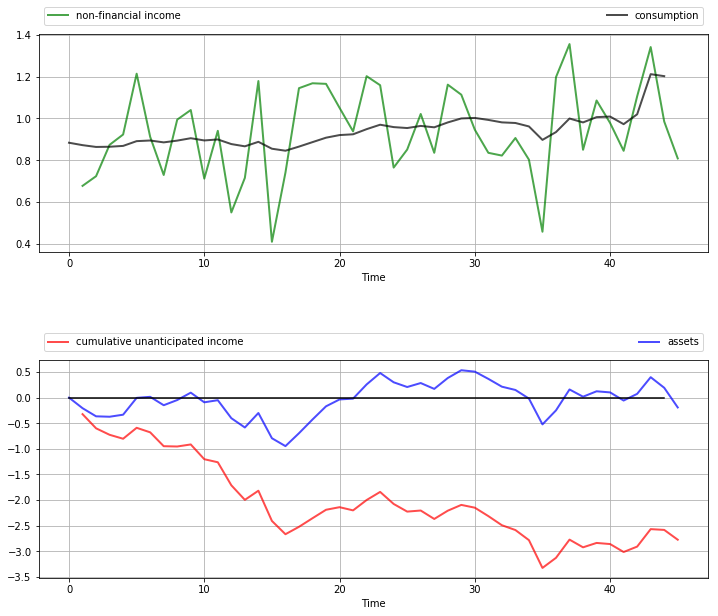

In [4]:
# Compute solutions and simulate
lq = LQ(Q, R, A, B, C, beta=0.96, T=T, Rf=Rf)
x0 = (0, 1)
xp, up, wp = lq.compute_sequence(x0)

# Convert back to assets, consumption and income
assets = xp[0, :]           # a_t
c = up.flatten() + c_bar    # c_t
income = σ * wp[0, 1:] + μ  # y_t

# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(list(range(1, T+1)), income, 'g-', label="non-financial income",
             **p_args)
axes[0].plot(list(range(T)), c, 'k-', label="consumption", **p_args)

axes[1].plot(list(range(1, T+1)), np.cumsum(income - μ), 'r-',
             label="cumulative unanticipated income", **p_args)
axes[1].plot(list(range(T+1)), assets, 'b-', label="assets", **p_args)
axes[1].plot(list(range(T)), np.zeros(T), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

Exercise 1

![Ex1](img/lqcontrol_1.png)

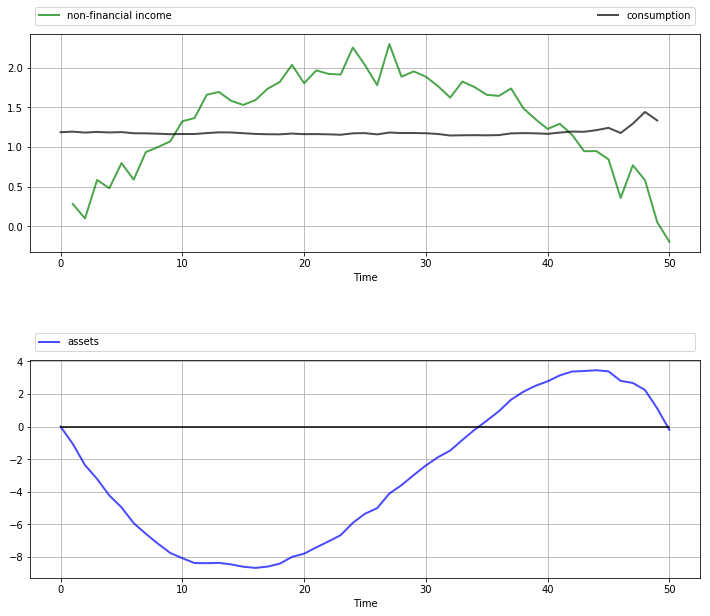

In [5]:
# Model parameters
r = 0.05
β = 1/(1 + r)
T = 50
c_bar = 1.5
σ = 0.15
μ = 2
q = 1e4
m1 = T * (μ/(T/2)**2)
m2 = -(μ/(T/2)**2)

# Formulate as an LQ problem
Q = 1
R = np.zeros((4, 4))
Rf = np.zeros((4, 4))
Rf[0, 0] = q
A = [[1 + r, -c_bar, m1, m2],
     [0,          1,  0,  0],
     [0,          1,  1,  0],
     [0,          1,  2,  1]]
B = [[-1],
     [ 0],
     [ 0],
     [ 0]]
C = [[σ],
     [0],
     [0],
     [0]]

# Compute solutions and simulate
lq = LQ(Q, R, A, B, C, beta=β, T=T, Rf=Rf)
x0 = (0, 1, 0, 0)
xp, up, wp = lq.compute_sequence(x0)

# Convert results back to assets, consumption and income
ap = xp[0, :]               # Assets
c = up.flatten() + c_bar    # Consumption
time = np.arange(1, T+1)
income = σ * wp[0, 1:] + m1 * time + m2 * time**2  # Income


# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(range(1, T+1), income, 'g-', label="non-financial income",
            **p_args)
axes[0].plot(range(T), c, 'k-', label="consumption", **p_args)

axes[1].plot(range(T+1), ap.flatten(), 'b-', label="assets", **p_args)
axes[1].plot(range(T+1), np.zeros(T+1), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

Exercise 2

![Ex2](img/lqcontrol_2.png)

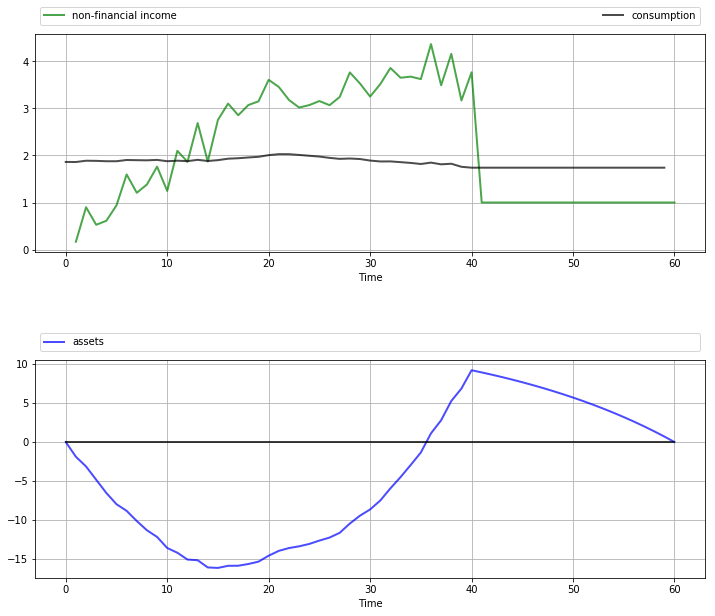

In [6]:
# Model parameters
r = 0.05
β = 1/(1 + r)
T = 60
K = 40
c_bar = 4
σ = 0.35
μ = 4
q = 1e4
s = 1
m1 = 2 * μ/K
m2 = -μ/K**2

# Formulate LQ problem 1 (retirement)
Q = 1
R = np.zeros((4, 4))
Rf = np.zeros((4, 4))
Rf[0, 0] = q
A = [[1 + r, s - c_bar, 0, 0],
     [0,             1, 0, 0],
     [0,             1, 1, 0],
     [0,             1, 2, 1]]
B = [[-1],
     [ 0],
     [ 0],
     [ 0]]
C = [[0],
     [0],
     [0],
     [0]]

# Initialize LQ instance for retired agent
lq_retired = LQ(Q, R, A, B, C, beta=β, T=T-K, Rf=Rf)
# Iterate back to start of retirement, record final value function
for i in range(T-K):
    lq_retired.update_values()
Rf2 = lq_retired.P

# Formulate LQ problem 2 (working life)
R = np.zeros((4, 4))
A = [[1 + r, -c_bar, m1, m2],
     [0,          1,  0,  0],
     [0,          1,  1,  0],
     [0,          1,  2,  1]]
B = [[-1],
     [ 0],
     [ 0],
     [ 0]]
C = [[σ],
     [0],
     [0],
     [0]]

# Set up working life LQ instance with terminal Rf from lq_retired
lq_working = LQ(Q, R, A, B, C, beta=β, T=K, Rf=Rf2)

# Simulate working state / control paths
x0 = (0, 1, 0, 0)
xp_w, up_w, wp_w = lq_working.compute_sequence(x0)
# Simulate retirement paths (note the initial condition)
xp_r, up_r, wp_r = lq_retired.compute_sequence(xp_w[:, K])

# Convert results back to assets, consumption and income
xp = np.column_stack((xp_w, xp_r[:, 1:]))
assets = xp[0, :]                  # Assets

up = np.column_stack((up_w, up_r))
c = up.flatten() + c_bar           # Consumption

time = np.arange(1, K+1)
income_w = σ * wp_w[0, 1:K+1] + m1 * time + m2 * time**2  # Income
income_r = np.ones(T-K) * s
income = np.concatenate((income_w, income_r))

# Plot results
n_rows = 2
fig, axes = plt.subplots(n_rows, 1, figsize=(12, 10))

plt.subplots_adjust(hspace=0.5)

bbox = (0., 1.02, 1., .102)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.7}

axes[0].plot(range(1, T+1), income, 'g-', label="non-financial income",
            **p_args)
axes[0].plot(range(T), c, 'k-', label="consumption", **p_args)

axes[1].plot(range(T+1), assets, 'b-', label="assets", **p_args)
axes[1].plot(range(T+1), np.zeros(T+1), 'k-')

for ax in axes:
    ax.grid()
    ax.set_xlabel('Time')
    ax.legend(ncol=2, **legend_args)

plt.show()

Exercise 3

![Ex3](img/lqcontrol_3.png)

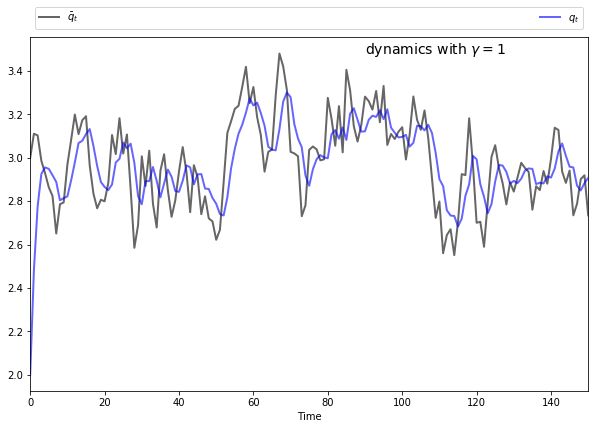

In [7]:
# Model parameters
a0 = 5
a1 = 0.5
σ = 0.15
ρ = 0.9
γ = 1
β = 0.95
c = 2
T = 120

# Useful constants
m0 = (a0-c)/(2 * a1)
m1 = 1/(2 * a1)

# Formulate LQ problem
Q = γ
R = [[ a1, -a1,  0],
     [-a1,  a1,  0],
     [  0,   0,  0]]
A = [[ρ, 0, m0 * (1 - ρ)],
     [0, 1,            0],
     [0, 0,            1]]

B = [[0],
     [1],
     [0]]
C = [[m1 * σ],
     [     0],
     [     0]]

lq = LQ(Q, R, A, B, C=C, beta=β)

# Simulate state / control paths
x0 = (m0, 2, 1)
xp, up, wp = lq.compute_sequence(x0, ts_length=150)
q_bar = xp[0, :]
q = xp[1, :]

# Plot simulation results
fig, ax = plt.subplots(figsize=(10, 6.5))

# Some fancy plotting stuff -- simplify if you prefer
bbox = (0., 1.01, 1., .101)
legend_args = {'bbox_to_anchor': bbox, 'loc': 3, 'mode': 'expand'}
p_args = {'lw': 2, 'alpha': 0.6}

time = range(len(q))
ax.set(xlabel='Time', xlim=(0, max(time)))
ax.plot(time, q_bar, 'k-', lw=2, alpha=0.6, label=r'$\bar q_t$')
ax.plot(time, q, 'b-', lw=2, alpha=0.6, label='$q_t$')
ax.legend(ncol=2, **legend_args)
s = f'dynamics with $\gamma = {γ}$'
ax.text(max(time) * 0.6, 1 * q_bar.max(), s, fontsize=14)
plt.show()

#### Lesson: Optimal Savings I: The Permanent Income Model

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from numba import njit

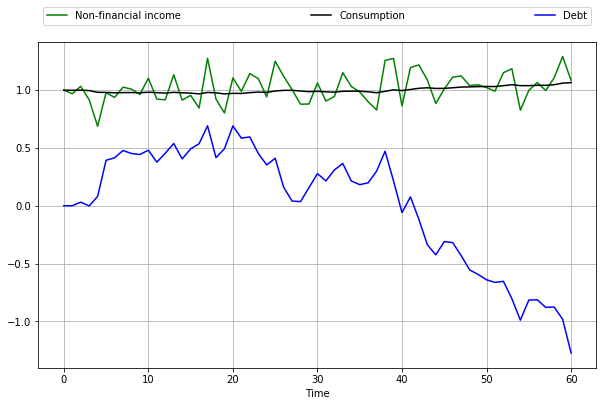

In [9]:
r = 0.05
β = 1 / (1 + r)
σ = 0.15
μ = 1
T = 60

@njit
def time_path(T):
    w = np.random.randn(T+1)  # w_0, w_1, ..., w_T
    w[0] = 0
    b = np.zeros(T+1)
    for t in range(1, T+1):
        b[t] = w[1:t].sum()
    b = -σ * b
    c = μ + (1 - β) * (σ * w - b)
    return w, b, c

w, b, c = time_path(T)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(μ + σ * w, 'g-', label="Non-financial income")
ax.plot(c, 'k-', label="Consumption")
ax.plot( b, 'b-', label="Debt")
ax.legend(ncol=3, mode='expand', bbox_to_anchor=(0., 1.02, 1., .102))
ax.grid()
ax.set_xlabel('Time')

plt.show()

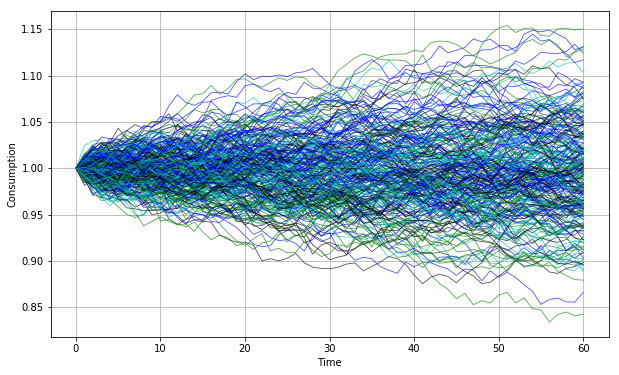

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

b_sum = np.zeros(T+1)
for i in range(250):
    w, b, c = time_path(T)  # Generate new time path
    rcolor = random.choice(('c', 'g', 'b', 'k'))
    ax.plot(c, color=rcolor, lw=0.8, alpha=0.7)

ax.grid()
ax.set(xlabel='Time', ylabel='Consumption')

plt.show()

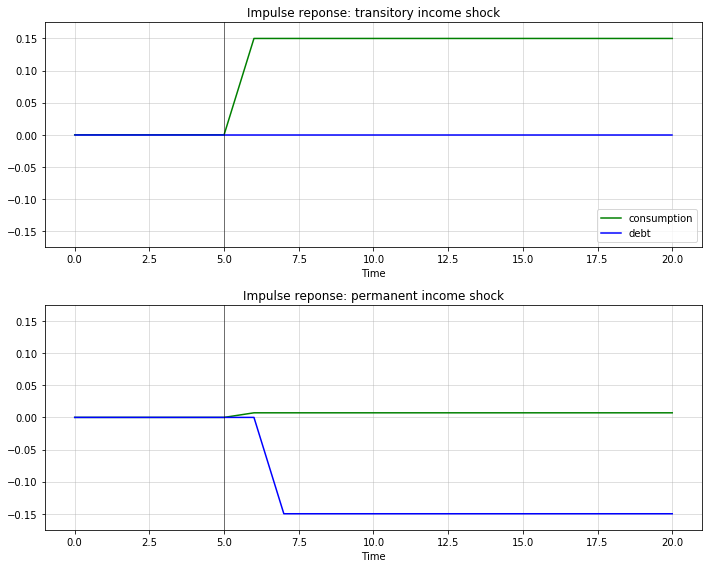

In [11]:
r = 0.05
β = 1 / (1 + r)
S = 5   # Impulse date
σ1 = σ2 = 0.15

@njit
def time_path(T, permanent=False):
    "Time path of consumption and debt given shock sequence"
    w1 = np.zeros(T+1)
    w2 = np.zeros(T+1)
    b = np.zeros(T+1)
    c = np.zeros(T+1)
    if permanent:
        w1[S+1] = 1.0
    else:
        w2[S+1] = 1.0
    for t in range(1, T):
        b[t+1] = b[t] - σ2 * w2[t]
        c[t+1] = c[t] + σ1 * w1[t+1] + (1 - β) * σ2 * w2[t+1]
    return b, c


fig, axes = plt.subplots(2, 1, figsize=(10, 8))
titles = ['transitory', 'permanent']

L = 0.175

for ax, truefalse, title in zip(axes, (True, False), titles):
    b, c = time_path(T=20, permanent=truefalse)
    ax.set_title(f'Impulse reponse: {title} income shock')
    ax.plot(c, 'g-', label="consumption")
    ax.plot(b, 'b-', label="debt")
    ax.plot((S, S), (-L, L), 'k-', lw=0.5)
    ax.grid(alpha=0.5)
    ax.set(xlabel=r'Time', ylim=(-L, L))

axes[0].legend(loc='lower right')

plt.tight_layout()
plt.show()



#### Lesson: Optimal Savings II: LQ Techniques

In [1]:
import quantecon as qe
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set parameters
α, β, ρ1, ρ2, σ = 10.0, 0.95, 0.9, 0.0, 1.0

R = 1 / β
A = np.array([[1., 0., 0.],
              [α,  ρ1, ρ2],
              [0., 1., 0.]])
C = np.array([[0.], [σ], [0.]])
G = np.array([[0., 1., 0.]])

# Form LinearStateSpace system and pull off steady state moments
μ_z0 = np.array([[1.0], [0.0], [0.0]])
Σ_z0 = np.zeros((3, 3))
Lz = qe.LinearStateSpace(A, C, G, mu_0=μ_z0, Sigma_0=Σ_z0)
μ_z, μ_y, Σ_z, Σ_y = Lz.stationary_distributions()

# Mean vector of state for the savings problem
mxo = np.vstack([μ_z, 0.0])

# Create stationary covariance matrix of x -- start everyone off at b=0
a1 = np.zeros((3, 1))
aa = np.hstack([Σ_z, a1])
bb = np.zeros((1, 4))
sxo = np.vstack([aa, bb])

# These choices will initialize the state vector of an individual at zero
# debt and the ergodic distribution of the endowment process. Use these to
# create the Bewley economy.
mxbewley = mxo
sxbewley = sxo

In [3]:
A12 = np.zeros((3,1))
ALQ_l = np.hstack([A, A12])
ALQ_r = np.array([[0, -R, 0, R]])
ALQ = np.vstack([ALQ_l, ALQ_r])

RLQ = np.array([[0., 0., 0., 0.],
                [0., 0., 0., 0.],
                [0., 0., 0., 0.],
                [0., 0., 0., 1e-9]])

QLQ = np.array([1.0])
BLQ = np.array([0., 0., 0., R]).reshape(4,1)
CLQ = np.array([0., σ, 0., 0.]).reshape(4,1)
β_LQ = β

In [4]:
print(f"A = \n {ALQ}")
print(f"B = \n {BLQ}")
print(f"R = \n {RLQ}")
print(f"Q = \n {QLQ}")

A = 
 [[ 1.          0.          0.          0.        ]
 [10.          0.9         0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.         -1.05263158  0.          1.05263158]]
B = 
 [[0.        ]
 [0.        ]
 [0.        ]
 [1.05263158]]
R = 
 [[0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-09]]
Q = 
 [1.]


In [5]:
lqpi = qe.LQ(QLQ, RLQ, ALQ, BLQ, C=CLQ, beta=β_LQ)

In [6]:
P, F, d = lqpi.stationary_values()  # Compute value function and decision rule
ABF = ALQ - BLQ @ F  #  Form closed loop system

In [7]:
# Use the above formulas to create the optimal policies for b_{t+1} and c_t
b_pol = G @ la.inv(np.eye(3, 3) - β * A) @ (A - np.eye(3, 3))
c_pol = (1 - β) * G @ la.inv(np.eye(3, 3) - β * A)

# Create the A matrix for a LinearStateSpace instance
A_LSS1 = np.vstack([A, b_pol])
A_LSS2 = np.eye(4, 1, -3)
A_LSS = np.hstack([A_LSS1, A_LSS2])

# Create the C matrix for LSS methods
C_LSS = np.vstack([C, np.zeros(1)])

# Create the G matrix for LSS methods
G_LSS1 = np.vstack([G, c_pol])
G_LSS2 = np.vstack([np.zeros(1), -(1 - β)])
G_LSS = np.hstack([G_LSS1, G_LSS2])

# Use the following values to start everyone off at b=0, initial incomes zero
μ_0 = np.array([1., 0., 0., 0.])
Σ_0 = np.zeros((4, 4))

In [8]:
ABF - A_LSS

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-9.51248175e-06,  9.51247915e-08,  3.36117263e-17,
        -1.99999923e-08]])

In [ ]:
print(c_pol, "\n", -F)

[[6.55172414e+01 3.44827586e-01 1.68058632e-18]] 
 [[ 6.55172323e+01  3.44827677e-01 -0.00000000e+00 -5.00000190e-02]]


In [ ]:
lss = qe.LinearStateSpace(A_LSS, C_LSS, G_LSS, mu_0=μ_0, Sigma_0=Σ_0)

In [ ]:
def income_consumption_debt_series(A, C, G, μ_0, Σ_0, T=150, npaths=25):
    """
    This function takes initial conditions (μ_0, Σ_0) and uses the
    LinearStateSpace class from QuantEcon to  simulate an economy
    npaths times for T periods. It then uses that information to
    generate some graphs related to the discussion below.
    """
    lss = qe.LinearStateSpace(A, C, G, mu_0=μ_0, Sigma_0=Σ_0)

    # Simulation/Moment Parameters
    moment_generator = lss.moment_sequence()

    # Simulate various paths
    bsim = np.empty((npaths, T))
    csim = np.empty((npaths, T))
    ysim = np.empty((npaths, T))

    for i in range(npaths):
        sims = lss.simulate(T)
        bsim[i, :] = sims[0][-1, :]
        csim[i, :] = sims[1][1, :]
        ysim[i, :] = sims[1][0, :]

    # Get the moments
    cons_mean = np.empty(T)
    cons_var = np.empty(T)
    debt_mean = np.empty(T)
    debt_var = np.empty(T)
    for t in range(T):
        μ_x, μ_y, Σ_x, Σ_y = next(moment_generator)
        cons_mean[t], cons_var[t] = μ_y[1], Σ_y[1, 1]
        debt_mean[t], debt_var[t] = μ_x[3], Σ_x[3, 3]

    return bsim, csim, ysim, cons_mean, cons_var, debt_mean, debt_var

def consumption_income_debt_figure(bsim, csim, ysim):

    # Get T
    T =  bsim.shape[1]

    # Create the first figure
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    xvals = np.arange(T)

    # Plot consumption and income
    ax[0].plot(csim[0, :], label="c", color="b")
    ax[0].plot(ysim[0, :], label="y", color="g")
    ax[0].plot(csim.T, alpha=.1, color="b")
    ax[0].plot(ysim.T, alpha=.1, color="g")
    ax[0].legend(loc=4)
    ax[0].set(title="Nonfinancial Income, Consumption, and Debt",
              xlabel="t", ylabel="y and c")

    # Plot debt
    ax[1].plot(bsim[0, :], label="b", color="r")
    ax[1].plot(bsim.T, alpha=.1, color="r")
    ax[1].legend(loc=4)
    ax[1].set(xlabel="t", ylabel="debt")

    fig.tight_layout()
    return fig

def consumption_debt_fanchart(csim, cons_mean, cons_var,
                              bsim, debt_mean, debt_var):
    # Get T
    T =  bsim.shape[1]

    # Create percentiles of cross-section distributions
    cmean = np.mean(cons_mean)
    c90 = 1.65 * np.sqrt(cons_var)
    c95 = 1.96 * np.sqrt(cons_var)
    c_perc_95p, c_perc_95m = cons_mean + c95, cons_mean - c95
    c_perc_90p, c_perc_90m = cons_mean + c90, cons_mean - c90

    # Create percentiles of cross-section distributions
    dmean = np.mean(debt_mean)
    d90 = 1.65 * np.sqrt(debt_var)
    d95 = 1.96 * np.sqrt(debt_var)
    d_perc_95p, d_perc_95m = debt_mean + d95, debt_mean - d95
    d_perc_90p, d_perc_90m = debt_mean + d90, debt_mean - d90


    # Create second figure
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    xvals = np.arange(T)

    # Consumption fan
    ax[0].plot(xvals, cons_mean, color="k")
    ax[0].plot(csim.T, color="k", alpha=.25)
    ax[0].fill_between(xvals, c_perc_95m, c_perc_95p, alpha=.25, color="b")
    ax[0].fill_between(xvals, c_perc_90m, c_perc_90p, alpha=.25, color="r")
    ax[0].set(title="Consumption/Debt over time",
              ylim=(cmean-15, cmean+15), ylabel="consumption")

    # Debt fan
    ax[1].plot(xvals, debt_mean, color="k")
    ax[1].plot(bsim.T, color="k", alpha=.25)
    ax[1].fill_between(xvals, d_perc_95m, d_perc_95p, alpha=.25, color="b")
    ax[1].fill_between(xvals, d_perc_90m, d_perc_90p, alpha=.25, color="r")
    ax[1].set(xlabel="t", ylabel="debt")

    fig.tight_layout()
    return fig

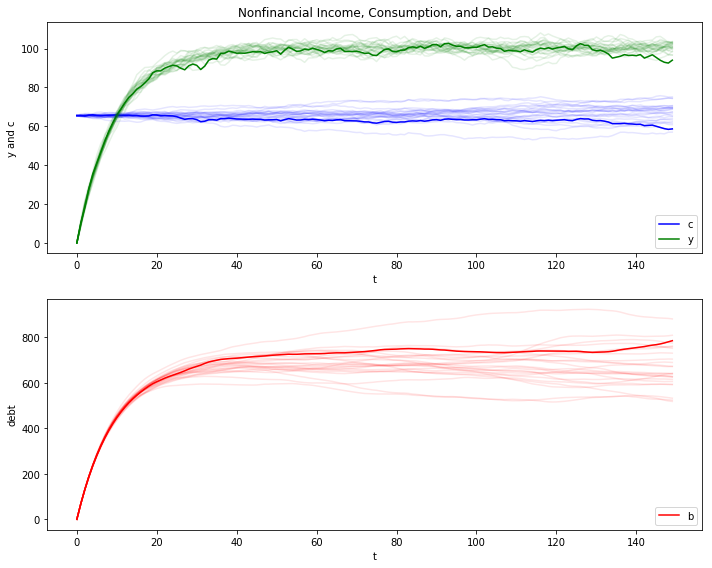

In [ ]:
out = income_consumption_debt_series(A_LSS, C_LSS, G_LSS, μ_0, Σ_0)
bsim0, csim0, ysim0 = out[:3]
cons_mean0, cons_var0, debt_mean0, debt_var0 = out[3:]

consumption_income_debt_figure(bsim0, csim0, ysim0)

plt.show()

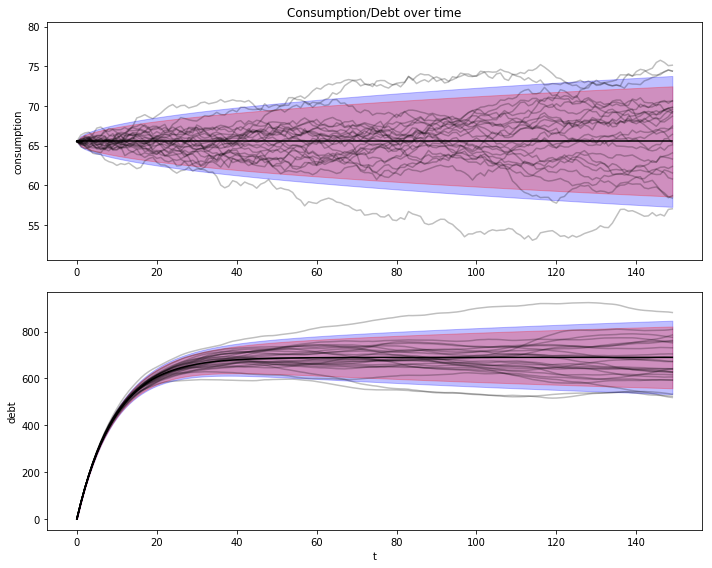

In [ ]:
consumption_debt_fanchart(csim0, cons_mean0, cons_var0,
                          bsim0, debt_mean0, debt_var0)

plt.show()

In [ ]:
def cointegration_figure(bsim, csim):
    """
    Plots the cointegration
    """
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot((1 - β) * bsim[0, :] + csim[0, :], color="k")
    ax.plot((1 - β) * bsim.T + csim.T, color="k", alpha=.1)

    ax.set(title="Cointegration of Assets and Consumption", xlabel="t")

    return fig

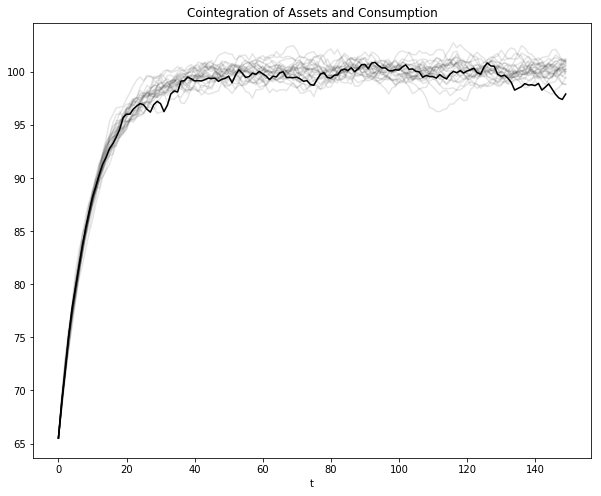

In [ ]:
cointegration_figure(bsim0, csim0)
plt.show()

In [ ]:
out = income_consumption_debt_series(A_LSS, C_LSS, G_LSS, mxbewley, sxbewley)
bsimb, csimb, ysimb = out[:3]
cons_meanb, cons_varb, debt_meanb, debt_varb = out[3:]

consumption_income_debt_figure(bsimb, csimb, ysimb)

plt.show()

In [ ]:
consumption_debt_fanchart(csimb, cons_meanb, cons_varb,
                          bsimb, debt_meanb, debt_varb)

plt.show()

In [ ]:
cointegration_figure(bsimb, csimb)
plt.show()